**Data Generation**

Installing / importing the required modules

In [2]:
!pip install pyshtools
!pip install cartopy

#For some reason, need to restart runtime after running this code block to install the modules

     |████████████████████████████████| 12.1MB 8.2MB/s 
     |████████████████████████████████| 11.6MB 46.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


     |████████████████████████████████| 14.4MB 324kB/s 
     |████████████████████████████████| 225kB 47.8MB/s 
  Created wheel for cartopy: filename=Cartopy-0.18.0-cp37-cp37m-linux_x86_64.whl size=15127716 sha256=8108659c345a98c8228b3705deae493ac3a07bed3276abfbf4c5fdaebe071115
  Stored in directory: /root/.cache/pip/wheels/8d/f8/da/2c05136f2162370d2baec85bfbbf91d7729ab9e248da878acd
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=5b6cc8b92891d8d837be1474cc0ede6ac8d0520b4eae9a96c1a8bf805cc7a2d7
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built cartopy pyshp


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from cartopy import crs as ccrs
#import pygmt - need to fix this, need to install using conda
from palettable import scientific as scm

import pyshtools as pysh

Uploading file containing the known power spectrum C_l to work with, and extracting the first column (l) and second column (l(l+1)C_l)

In [2]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving camb_11312141_scalcls.txt to camb_11312141_scalcls.txt
User uploaded file "camb_11312141_scalcls.txt" with length 180318 bytes


In [40]:
df = pd.read_csv('camb_11312141_scalcls.txt', sep = '    ', header=None)

ell = df[0].values
C_ell_imported = df[1].values
C_ell = C_ell_imported/(ell*(ell+1))

#Manually inputting 2 zeros to start of power spectrum array, because we are only interested in l>1
C_ell = np.insert(C_ell, 0, 0)
C_ell = np.insert(C_ell, 0, 0)

print(ell[0:3])
print(C_ell[0:3])

[2 3 4]
[  0.    0.  201.3]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


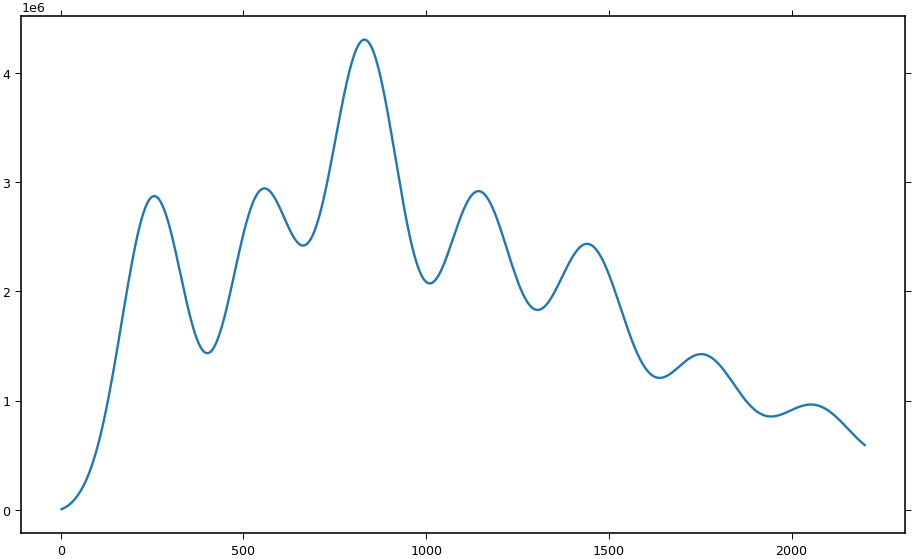

In [51]:
C_ell_plotting = (C_ell_imported)*(2*ell + 1)
plt.plot(ell,C_ell_plotting)

Using pysh tools, and C_l as the known power spectrum to plot the spherical harmonics, seed can be used to create reproducible plots, but changed to produce new ones

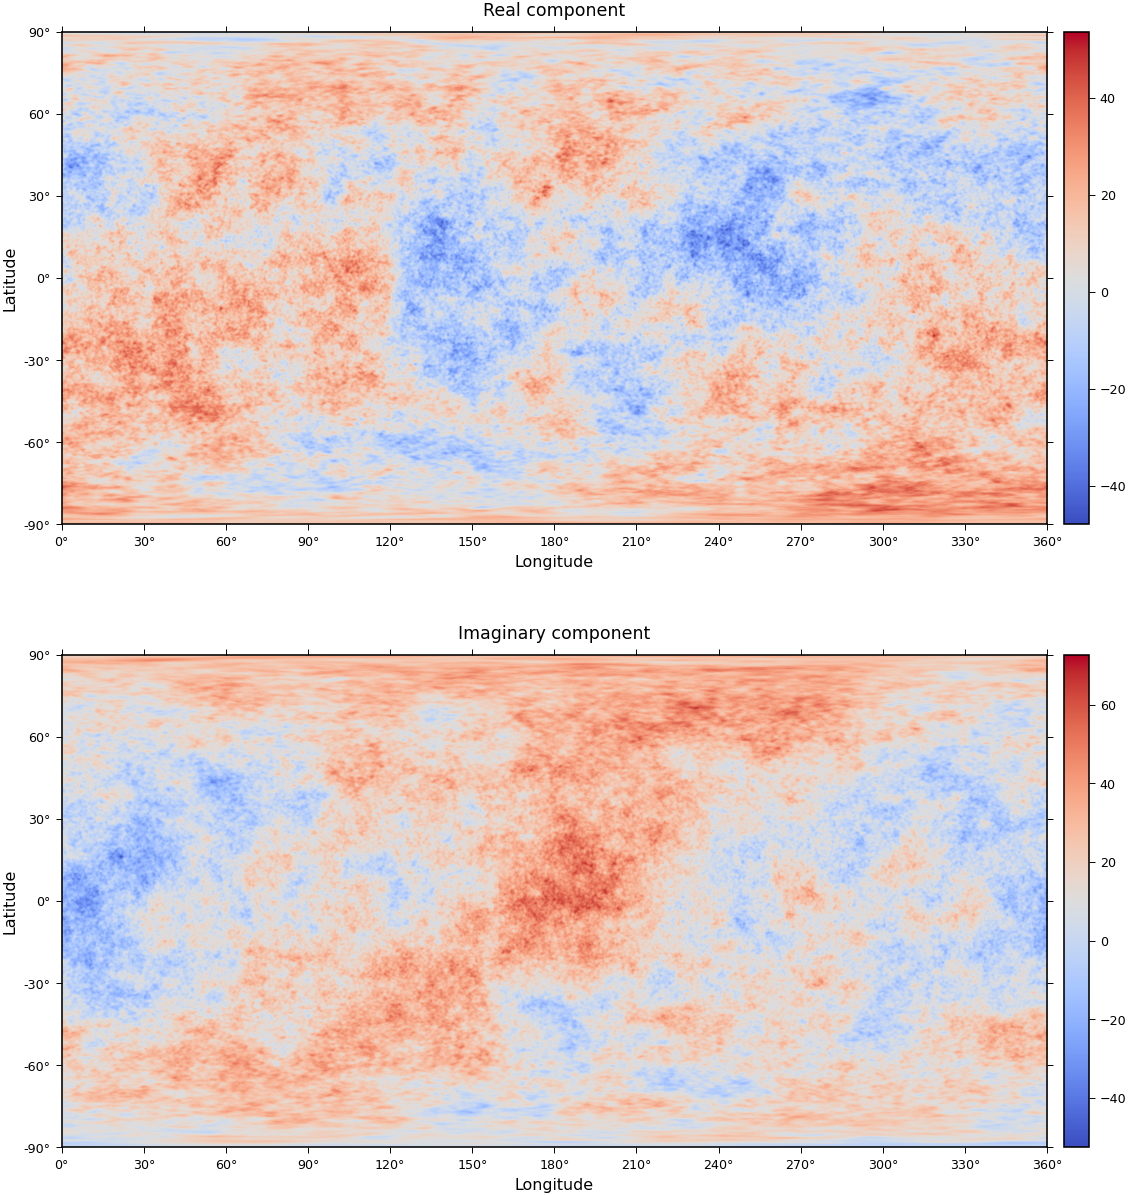

In [29]:
clm = pysh.SHCoeffs.from_random(C_ell[0:2000], seed = 1234, kind = 'complex')
#fig, ax = clm.plot_spectrum(show=False)

grid = clm.expand()
fig, ax = grid.plot(cmap='coolwarm', colorbar='right', show=False)
pysh.utils.figstyle(figsize=(10,6))

Trying to use Planck colourmap, using https://zonca.dev/2013/09/Planck-CMB-map-at-high-resolution.html


Saving PlanckColourMap.txt to PlanckColourMap (1).txt


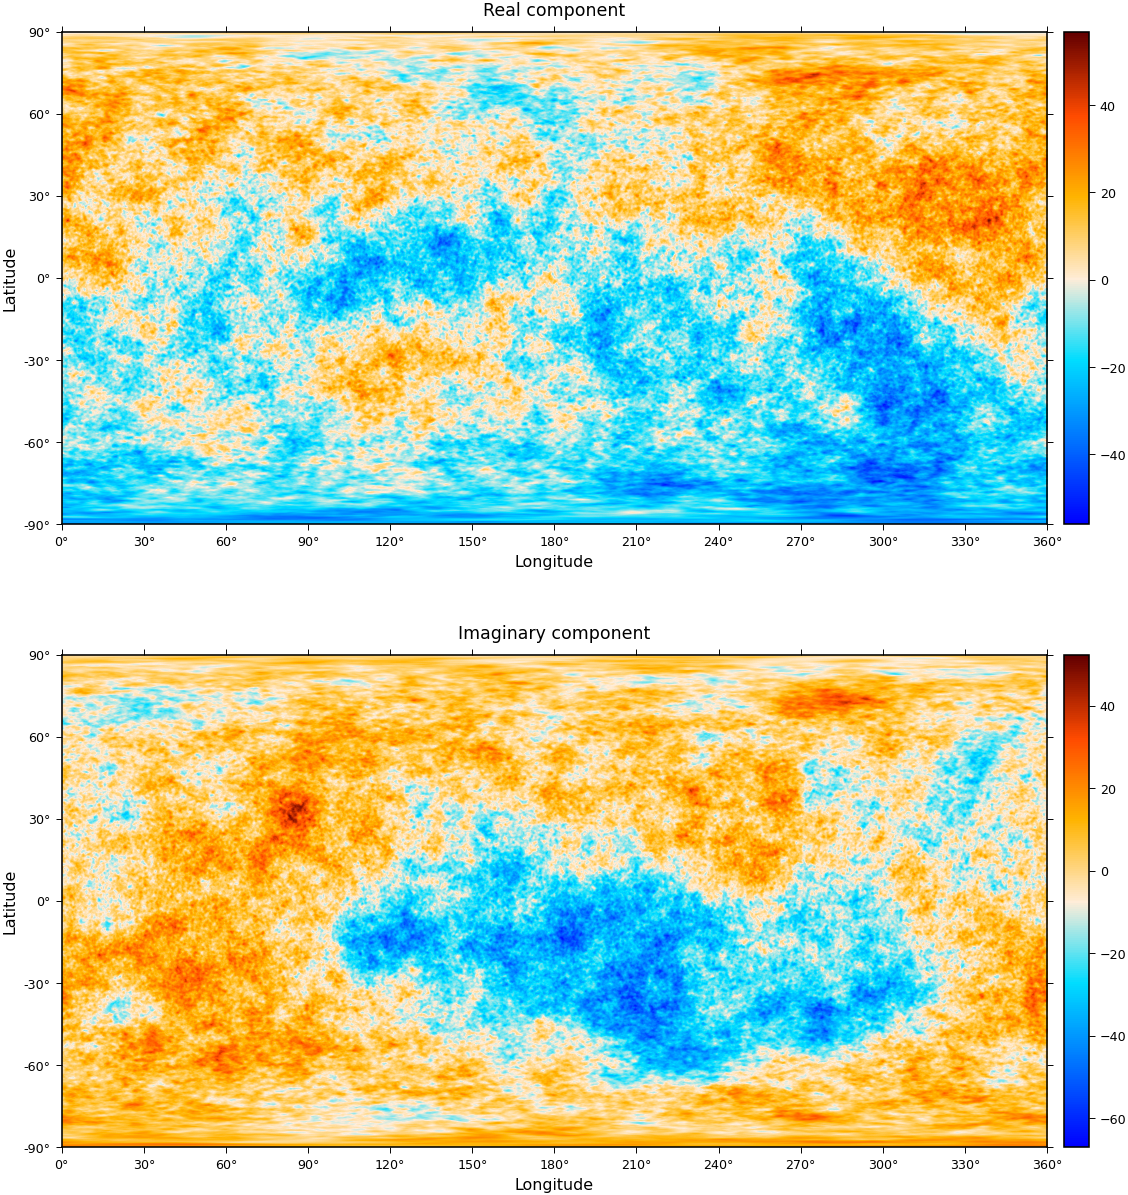

In [28]:
from matplotlib.colors import ListedColormap
files.upload()

colombi1_cmap = ListedColormap(np.loadtxt("PlanckColourMap.txt")/255.)
cmap = colombi1_cmap
fig, ax = grid.plot(cmap=cmap, colorbar='right', show=False)
pysh.utils.figstyle(figsize=(10,6))

Trying a different method, generating the coefficients myself


In [52]:
max_l = 2200

#Spherical harmonics initialised with coefficients equal to 0
clm = pysh.SHCoeffs.from_zeros(max_l, csphase = -1)

for l in range(2,max_l):
  a_lm = np.zeros(2*l+1)
  count = 0
  for m in range(-l,l+1):
    #Each a_lm selected from a Gaussian distribution
    a_lm[count] = random.gauss(0,(C_ell[l-2])**(1/2))
    count += 1
  m_values = np.arange(-np.int(l), np.int(l+1),1)

  #Change the coefficients to calculated values for each l
  clm.set_coeffs(values=a_lm, ls=int(l), ms=m_values)


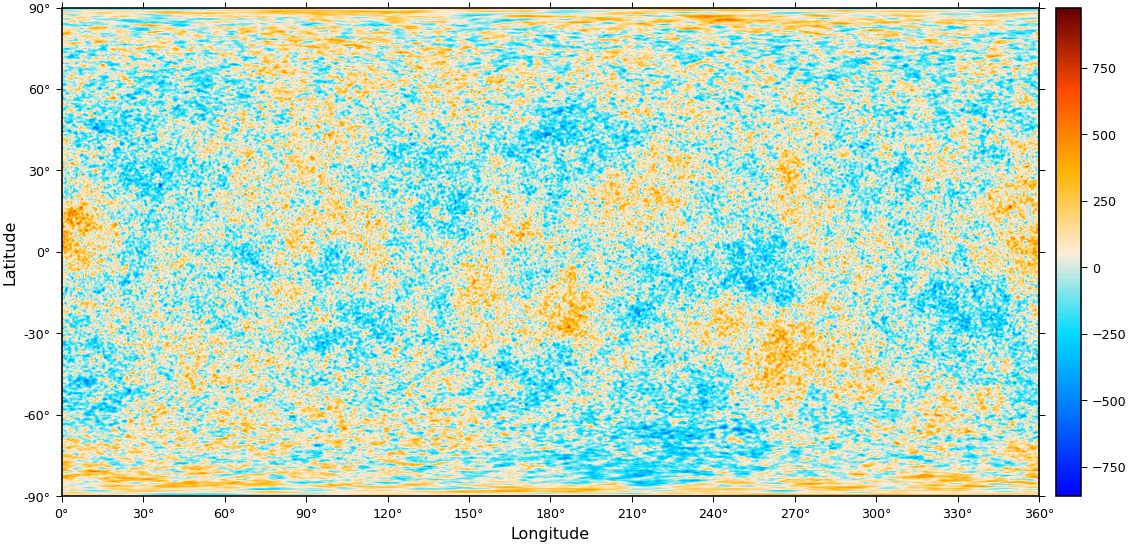

In [53]:
grid = clm.expand()
fig, ax = grid.plot(cmap=cmap, colorbar='right', show=False)
pysh.utils.figstyle(figsize=(10,6))

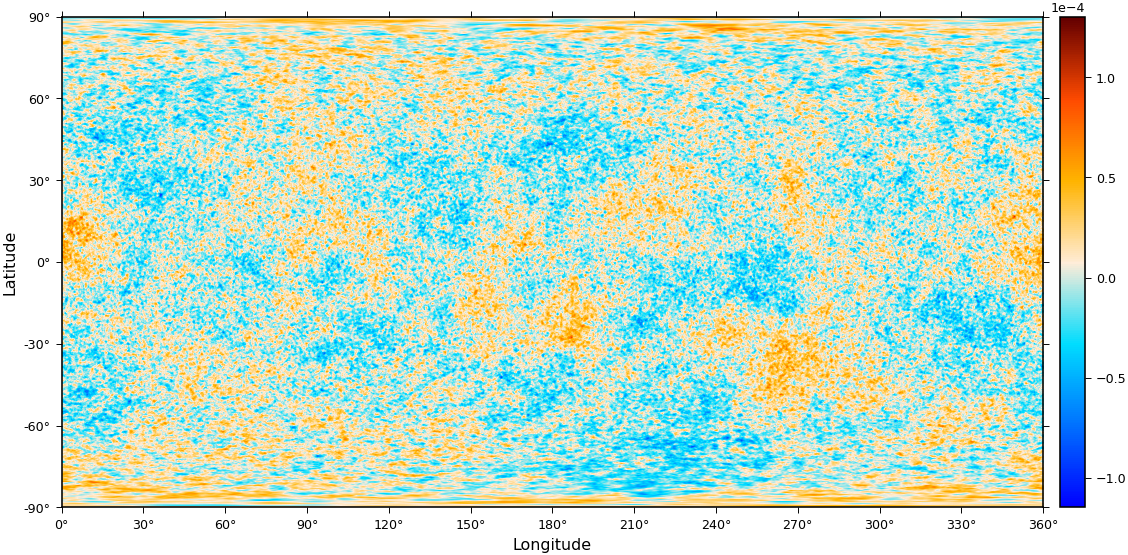

In [55]:
grid = clm.expand()/7500000
fig, ax = grid.plot(cmap=cmap, colorbar='right', show=False)
pysh.utils.figstyle(figsize=(10,6))

Same as above, but with complex a_lm's instead

In [49]:
max_l = 2200

#Spherical harmonics initialised with coefficients equal to 0
clm = pysh.SHCoeffs.from_zeros(max_l, kind='complex', csphase=-1)

for l in range(2,max_l):
  a_lm = np.zeros(2*l+1)
  count = 0
  for m in range(-l,l+1):
    #Each a_lm selected from a Gaussian distribution
    a_lm[count] = random.gauss(0,(C_ell[l-2])**(1/2)) + 1j*random.gauss(0,(C_ell[l-2])**(1/2))
    count += 1
  m_values = np.arange(-np.int(l), np.int(l+1),1)

  #Change the coefficients to calculated values for each l
  clm.set_coeffs(values=a_lm, ls=int(l), ms=m_values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


In [50]:
grid = clm.expand()
fig, ax = grid.plot(cmap=cmap, colorbar='right', show=False)
pysh.utils.figstyle(figsize=(10,6))

Output hidden; open in https://colab.research.google.com to view.